## ASL Classifier 


![](https://d.newsweek.com/en/full/1394686/asl-getty-images.jpg)

source : https://www.newsweek.com/asl-day-2019-american-sign-language-1394695



# **<span style="color:#6daa9f;">1.Import Library & Packages </span>**


In [12]:
import pandas
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
testfile = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
trainfile = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'


In [14]:
ex = cv2.imread('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/F/F1009.jpg')

**Viewing the image**

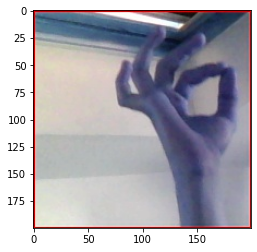

In [15]:
plt.imshow(ex)
plt.show()

In [16]:
ex.shape

(200, 200, 3)

In [17]:
# **<span style="color:#6daa9f;">2.Image Preprocessing </span>**


**RGB to GrayScale**

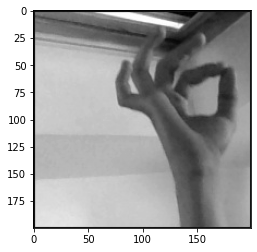

In [18]:
from skimage import color

ex1 = cv2.cvtColor(ex, cv2.COLOR_BGR2GRAY)
plt.imshow(ex1,cmap = 'gray')

**Denoising**

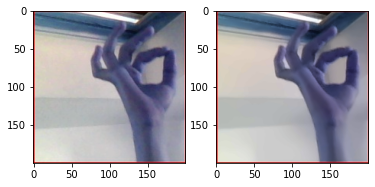

In [19]:
def denoise(image):
    
    denoised_image = cv2.fastNlMeansDenoisingColored(image,None,h=2)
    
    return denoised_image

denoise_ex = denoise(ex)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(ex)
plt.subplot(1,2,2)
plt.imshow(denoise_ex)

# **<span style="color:#6daa9f;">3.Visualization </span>**


Our image in the dataset is a 3d ndarray with the width and height of 200 and a color image as the size is 3

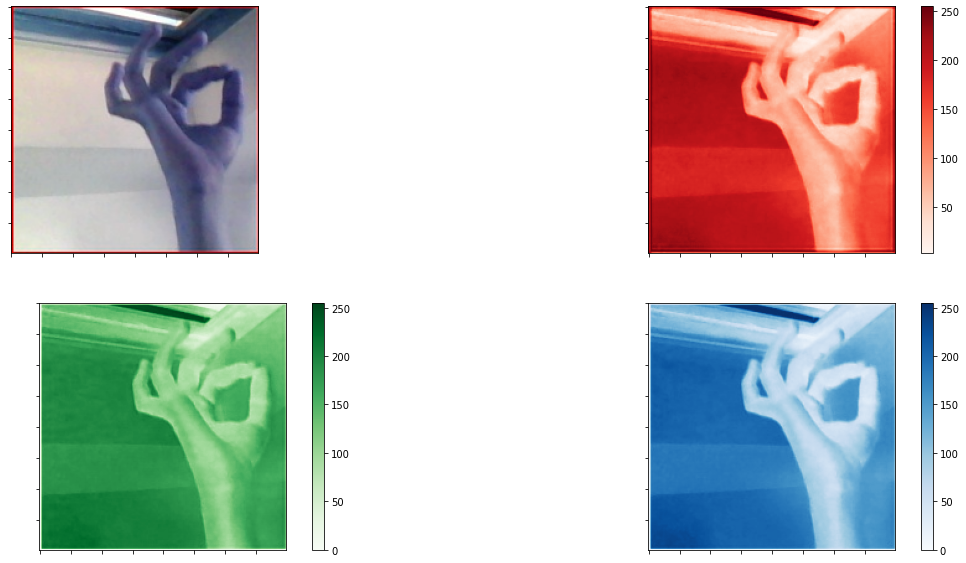

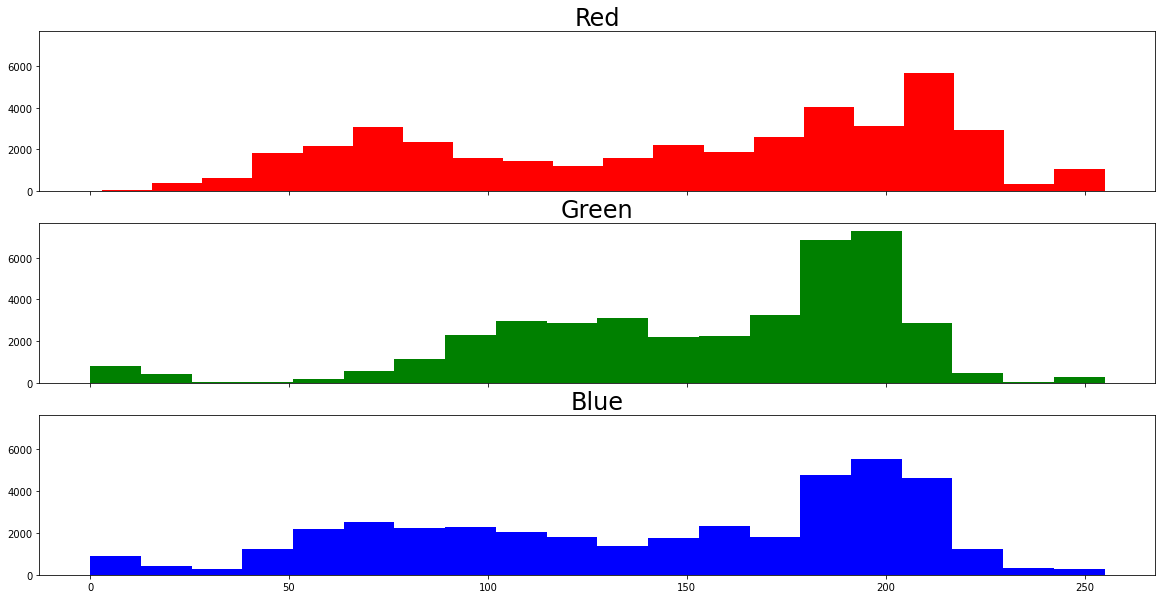

In [20]:
# color of the image
red = ex[:, :, 0]
blue= ex[:, :, 1]
green = ex[:,:,2]


#set up the figure for plotting
fig, axs = plt.subplots(2,2, figsize=(20, 10))

cax_00 = axs[0,0].imshow(ex)
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

cax_01 = axs[0,1].imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

cax_10 = axs[1,0].imshow(green, cmap='Greens')
fig.colorbar(cax_10, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

cax_11 = axs[1,1].imshow(blue, cmap='Blues')
fig.colorbar(cax_11, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

#plot histograms
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))

axs[0].hist(red.ravel(), bins=20, color = 'red')
axs[0].set_title('Red',fontsize=24)
axs[1].hist(green.ravel(), bins=20, color = 'green')
axs[1].set_title('Green',fontsize=24)
axs[2].hist(blue.ravel(), bins=20, color = 'blue')
axs[2].set_title('Blue',fontsize=24)

plt.show()

# **<span style="color:#6daa9f;">4. Load Data </span>**

* Preprocess images(resize,denoise,enhance contrast)
* Defining a dictionary which contains labels and its mapping to a number which acts as class label.
* loading image data and labels and then mapping those labels to the dictionary defined before.
* Normalizing image data.
* converting labels to one hot format as our keras model don't accept categorical label
* creating training and test data by splitting original data into 95% of training data and 5% testing data.


In [21]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}\

def load_data():
    """
    Loads sign language dataset.
    """
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(trainfile):
        
        print(folder, end = ' | ')
        for image in os.listdir(trainfile + "/" + folder):
            temp_img = cv2.imread(trainfile + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, (32,32))
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_dict[folder])

            
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = load_data()

y_test_ = keras.utils.to_categorical(y_test,29)


N | R | space | B | I | del | F | H | E | U | M | X | K | Q | Y | S | G | A | O | T | V | Z | C | P | L | W | D | nothing | J | 
Loaded 82650 images for training, Train data shape = (82650, 32, 32, 3)
Loaded 4350 images for testing Test data shape = (4350, 32, 32, 3)


In [23]:
y_train_ = keras.utils.to_categorical(y_train,29)


In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train_.shape)
print(y_test_.shape)

(82650, 32, 32, 3)
(4350, 32, 32, 3)
(82650, 29)
(4350, 29)


In [25]:
len(y_train)

82650

X_train = X_train.reshape(-1,32, 32, 1)
X_test = X_test.reshape(-1,32,32,1)

# **<span style="color:#6daa9f;">4. Model </span>**

implementing with keras library
activation: activation function, relu
metrics : accuracy
optimizer:  adam optimizer

Adam is one of the most effective optimization algorithms for training neural networks.
Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters

In [26]:
# function to create model that receives an optimizer as argument
def create_model(optimizer): 
    # create model (The Sequential model is a linear stack of layers)
    model = Sequential()
    
    #add 64 filters 
    #(3,3) means 3x3 dimension that specifies height & width of the 2d convolution window
    #relu is the name of the activation function to be applied after performing the convolution
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    #max pooling to reduce the spatial dimensions of the output volume &reduce overfitting
    model.add(MaxPool2D(pool_size=(2, 2)))
     
    # Relu to help network learn non-linear decision boundary 
    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    # sigmoid classifier to predict input class label
    model.add(Dense(1024, activation='sigmoid')) # adds an output layer(dense = regular deeply connected neural network layer)
    # softmax classifier to predict input class label
    model.add(Dense(29, activation='softmax'))# adds an output layer #
    # compile or train the model with the optimizer, loss, & metrics
    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    # Summarize the model
    model.summary()
    return model



In [27]:
from keras import callbacks


def fit_model(model,epochs):
    
    earlystopping = callbacks.EarlyStopping(monitor = 'val_loss', min_delta=0.001, # minimium amount of change to count as an improvement
    patience=23, # how many epochs to wait before stopping
    restore_best_weights = True)
    
    model_hist = model.fit(X_train, y_train_, batch_size = 50, epochs = epochs, validation_split = 0.1,callbacks =[earlystopping])
    
    return model_hist

In [28]:
epochs = 50 
print('Train and Baseline Model with adam Optimizer and',epochs,' epochs') 
model = create_model(optimizer = 'adam')
history = fit_model(model,epochs)


Train and Baseline Model with adam Optimizer and 50  epochs
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
______________________________________________________________

In [29]:
print('Training accuracy:', np.mean(history.history['accuracy']))
print('Training loss:', np.mean(history.history['loss']))
print('Validation accuracy:', np.mean(history.history['val_accuracy']))
print('Validation loss:', np.mean(history.history['val_loss']))

Training accuracy: 0.9906352790626319
Training loss: 0.029751539104492276
Validation accuracy: 0.9917431103216635
Validation loss: 0.024927057099302073


Plot model performance metrics for model performance

In [30]:
def plot_performance(hist_model):
    
    plt.plot(hist_model.history['accuracy'])
    plt.plot(hist_model.history['val_accuracy'])
    plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
    plt.title('accuracy plot - training vs validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()
    
    plt.plot(hist_model.history['loss'])
    plt.plot(hist_model.history['val_loss'])
    plt.legend(['training loss', 'validation loss'], loc = 'upper right')
    plt.title('loss plot - training vs validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

 Model with preprocesisng with adam Optimizer and 50  epochs


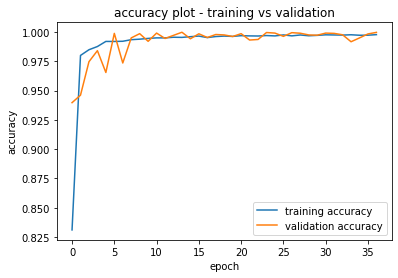

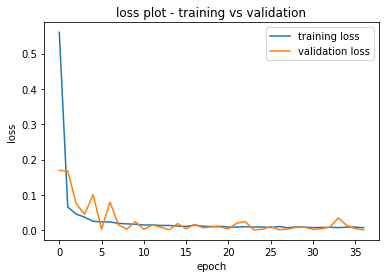

In [31]:
print(' Model with preprocesisng with adam Optimizer and',epochs,' epochs') 
plot_performance(history)

In [32]:
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(X_test, y_test_)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    
evaluate_model(model)

136/136 [==============================] - 2s 13ms/step - loss: 0.1174 - accuracy: 0.9959
Test accuracy: 0.9958620667457581
Test loss: 0.1174074336886406


In [33]:
from sklearn.metrics import classification_report

uniq_labels = sorted(os.listdir(trainfile))

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       1.00      0.99      1.00       125
           2       1.00      0.99      0.99       168
           3       0.99      0.98      0.99       133
           4       1.00      0.99      1.00       143
           5       1.00      0.99      0.99       151
           6       1.00      0.98      0.99       146
           7       1.00      0.99      1.00       155
           8       1.00      1.00      1.00       147
           9       1.00      0.99      1.00       157
          10       1.00      1.00      1.00       139
          11       1.00      1.00      1.00       159
          12       1.00      0.99      1.00       134
          13       1.00      1.00      1.00       147
          14       1.00      0.99      1.00       188
          15       1.00      1.00      1.00       166
          16       1.00      1.00      1.00       158
          17       1.00    

**Test Model**

**Load Test Data**

In [34]:
def load_test_data():
    images = []
    names = []
    size = 64,64
    for image in os.listdir(testfile):
        temp = cv2.imread(testfile + '/' + image)
        temp = cv2.resize(temp, (32,32))
        #temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()


In [35]:
# make predictions on an image and append it to the list (predictions).
predictions = [model.predict_classes(image.reshape(1,32,32,3))[0] for image in X_test]


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

In [37]:
len(predictions)

4350

In [38]:
# list out keys and values separately
key_list = list(labels_dict.keys())
val_list = list(labels_dict.values())

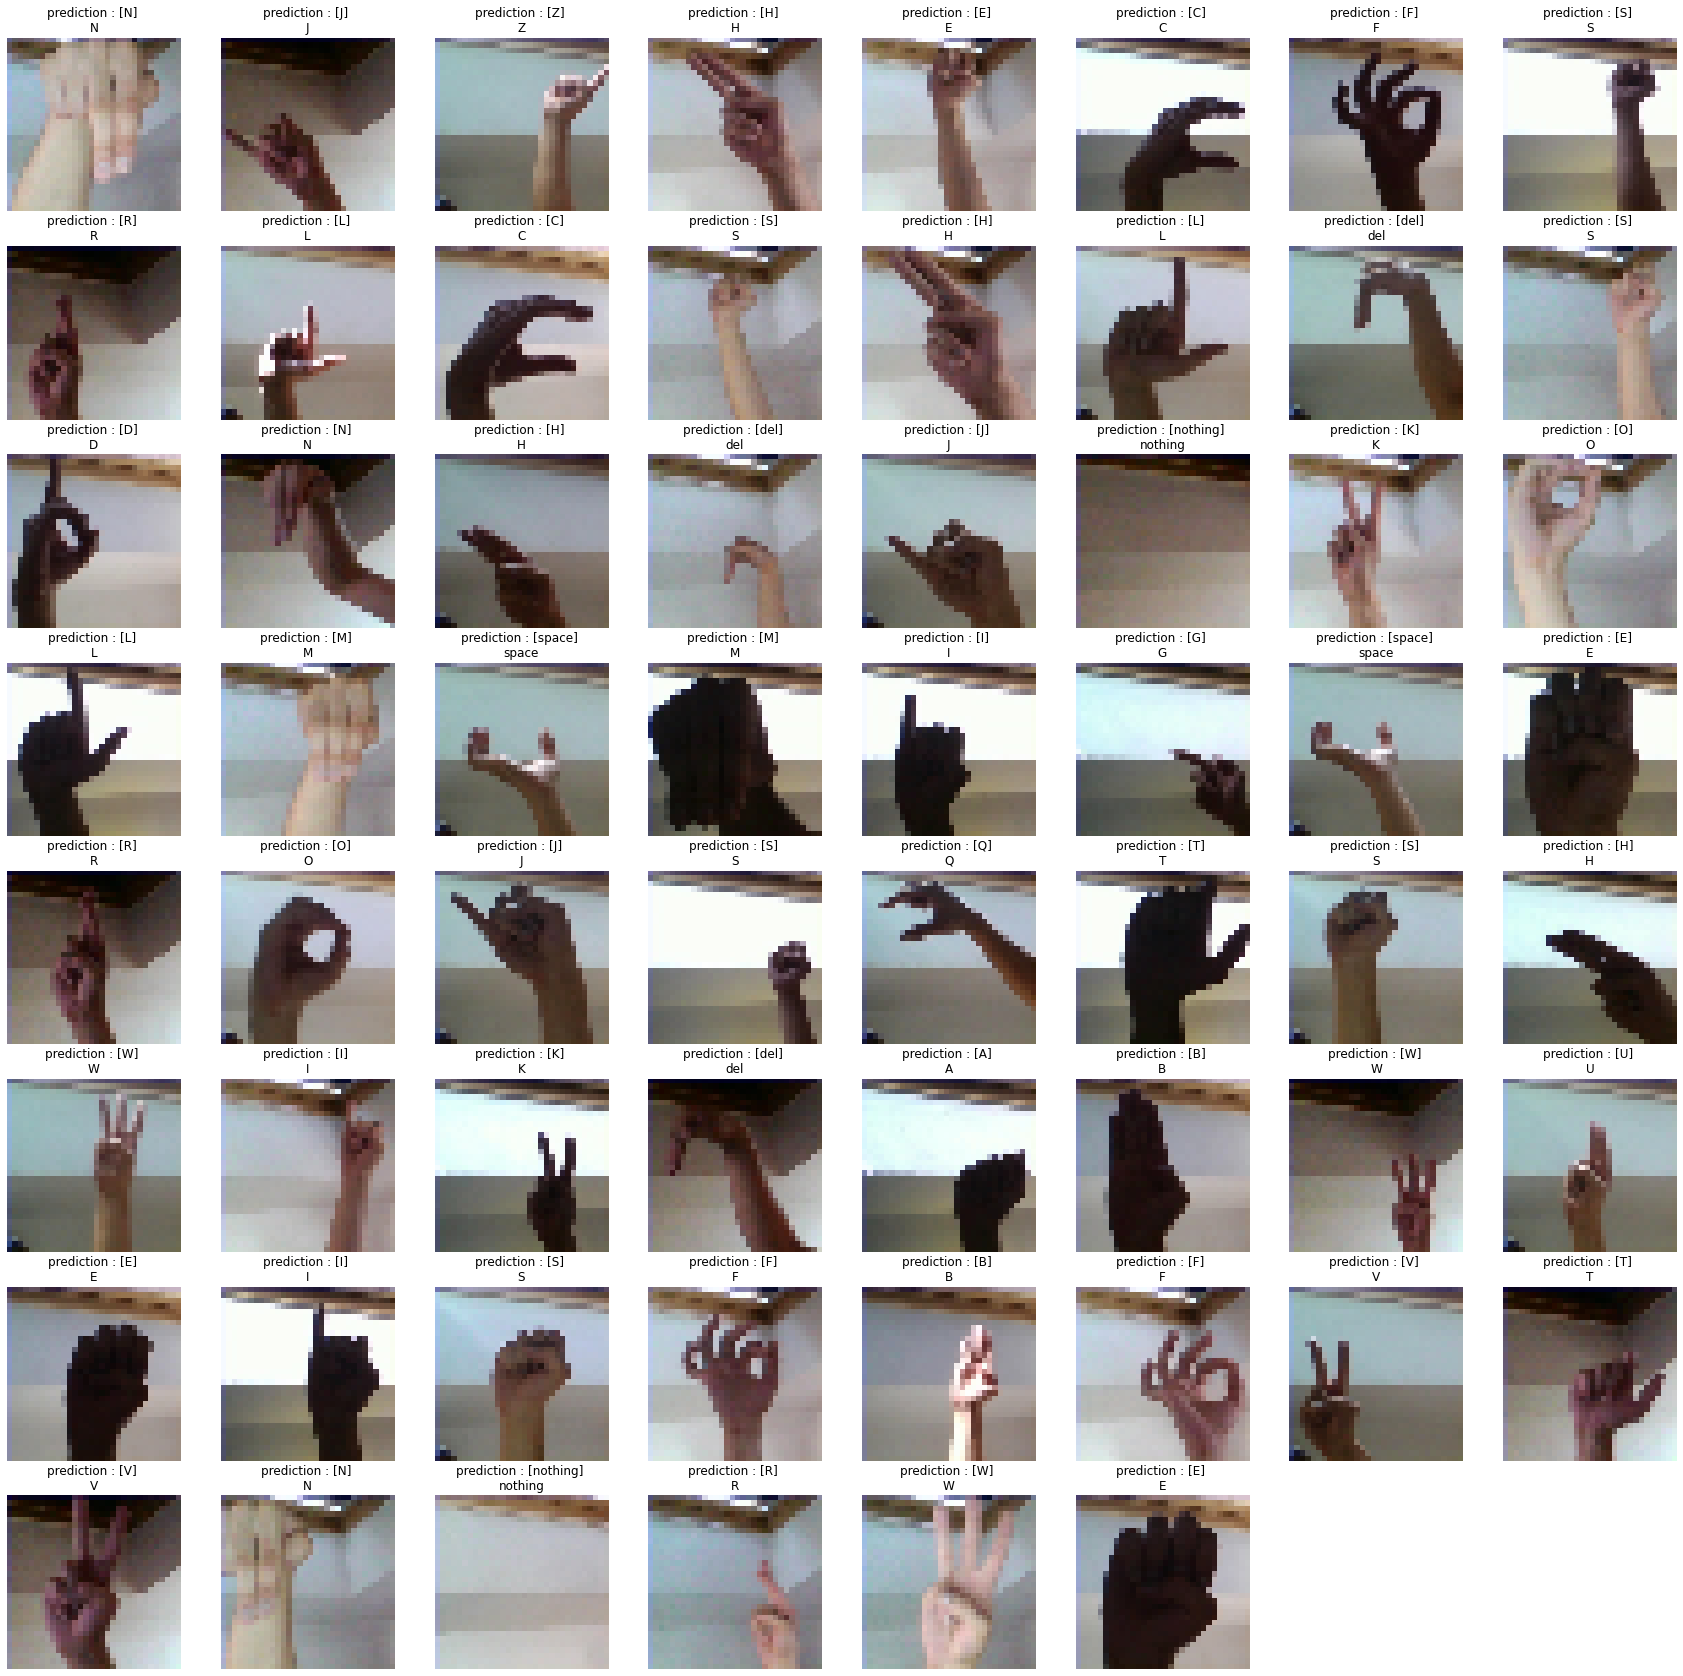

In [39]:
predfigure = plt.figure(figsize = (30,30))
def plot_image_1(fig, image,label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    title = "prediction : [" + str(predictions_label) + "] "+ "\n"+ key_list[label]
    plt.title(title)
    return

 
image_index = 700
row = 8
col = 8
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, X_test[image_index],val_list.index(y_test[image_index]),predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()